In [1]:
import seaborn as sns
import pandas as pd

In [2]:
df = pd.read_csv('data\house_price_prediction_dataset.csv')

In [3]:
df.head()

,Area (sqft),BHK,Bathroom,Location,Parking,Furnishing,Price (in Lakhs)
0,1445,2,1,Mumbai,2,Semi-Furnished,103.25
1,1153,1,1,Mumbai,1,Semi-Furnished,91.65
2,1156,3,3,Pune,2,Unfurnished,124.80
3,1448,5,3,Delhi,0,Furnished,147.40
4,807,3,2,Pune,2,Furnished,94.35


In [4]:
df.drop(['Parking','Furnishing','Location'],axis=1,inplace=True)

In [5]:
df.head()

,Area (sqft),BHK,Bathroom,Price (in Lakhs)
0,1445,2,1,103.25
1,1153,1,1,91.65
2,1156,3,3,124.80
3,1448,5,3,147.40
4,807,3,2,94.35


In [6]:
df.rename(columns={"Area (sqft)" : "Area"},inplace=True)

In [7]:
df.head()

,Area,BHK,Bathroom,Price (in Lakhs)
0,1445,2,1,103.25
1,1153,1,1,91.65
2,1156,3,3,124.80
3,1448,5,3,147.40
4,807,3,2,94.35


In [8]:
df.isnull().sum()

Area                0
BHK                 0
Bathroom            0
Price (in Lakhs)    0
dtype: int64

In [9]:
df.rename(columns={"Price (in Lakhs)" : "Price"},inplace=True)

In [10]:
df.head()

,Area,BHK,Bathroom,Price
0,1445,2,1,103.25
1,1153,1,1,91.65
2,1156,3,3,124.80
3,1448,5,3,147.40
4,807,3,2,94.35


In [11]:
x = df.iloc[:,:3]
y = df.iloc[:,3:]

In [12]:
x

,Area,BHK,Bathroom
0,1445,2,1
1,1153,1,1
2,1156,3,3
3,1448,5,3
4,807,3,2
...,...,...,...
95,2122,1,1
96,447,5,2
97,954,1,1
98,1312,3,1


In [13]:
y

,Price
0,103.25
1,91.65
2,124.80
3,147.40
4,94.35
...,...
95,127.10
96,91.35
97,82.70
98,122.60


In [14]:
from sklearn.model_selection import train_test_split

x_train , x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [15]:
x_train

,Area,BHK,Bathroom
55,1268,3,3
88,1317,1,1
26,1748,5,1
42,1789,3,2
69,2421,2,1
...,...,...,...
60,1621,1,1
71,1587,4,4
14,2315,5,5
92,1154,4,4


In [16]:
x_test

,Area,BHK,Bathroom
83,2096,4,4
53,1791,2,2
70,593,3,3
45,1936,4,1
44,908,2,1
39,1971,4,3
22,2034,2,1
80,1488,4,4
10,1919,5,2
0,1445,2,1


In [17]:
y_train

,Price
55,112.40
88,88.85
26,155.40
42,139.45
69,155.05
...,...
60,107.05
71,154.35
14,210.75
92,126.70


In [18]:
y_test

,Price
83,185.80
53,131.55
70,86.65
45,162.80
44,79.40
39,173.55
22,132.70
80,147.40
10,170.95
0,103.25


In [19]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [20]:
model.fit(x_train,y_train)

LinearRegression()

In [21]:
y_pred = model.predict(x_test)

#### Accuracy

In [22]:
from sklearn.metrics import r2_score

r2_score(y_test,y_pred)

0.9779621838686351

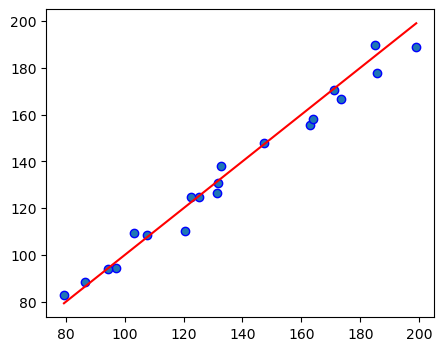

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,4))

plt.scatter(y_test,y_pred,edgecolor = 'blue')
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],color = 'red')

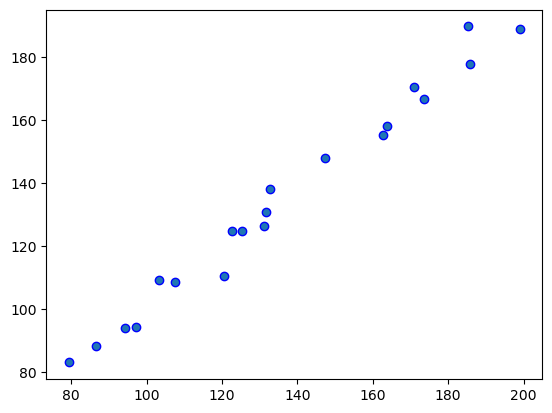

In [24]:
plt.scatter(y_test,y_pred,edgecolor = 'blue')

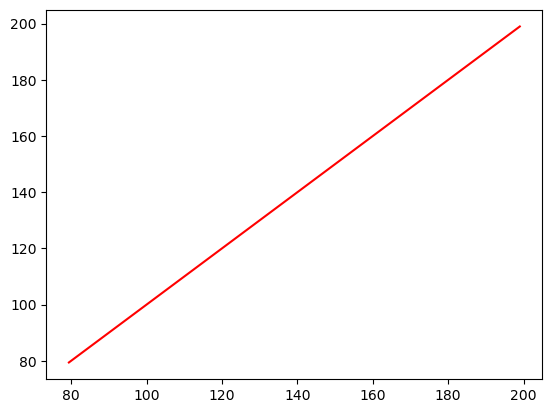

In [25]:
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],color = 'red')

## For saving the model

In [26]:
import pickle

with open('model\my_model.pkl','wb') as file:
    pickle.dump(model,file)